# Credit Risk Analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
Credit_Risk=pd.read_csv('german.csv')
Credit_Risk.head(5)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,2,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,3,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,4,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,5,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


In [25]:
Credit_Risk=Credit_Risk.drop(['Unnamed: 0'],axis=1)
Credit_Risk.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


In [26]:
Credit_Risk.rename(columns={'V1':'chk_acct','V2':'Duration','V3':'credit_his','V4':'purpose','V5':'Amount','V6':'saving_acct','V7':'present_emp','V8':'installment_rate','V9':'sex','V10':'other_debtor','V11':'present_resid','V12':'property','V13':'age','V14':'other_install','V15':'housing','V16':'n_credits','V17':'job','V18':'n_people','V19':'telephone','V20':'foreign','V21':'response'}, inplace=True)
Credit_Risk.head(5)

,chk_acct,Duration,credit_his,purpose,Amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


In [27]:
#Replacing 1 with 0 and 2 with 1 in the response column
Credit_Risk['response'] = Credit_Risk['response'].replace({1:0, 2:1})

In [28]:
Credit_Risk

,chk_acct,Duration,credit_his,purpose,Amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,good,A191,A201,0
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,good,A192,A201,0
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,good,A191,A201,0
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,good,A192,A201,1


In [29]:
Credit_Risk['response'] = Credit_Risk['response'].astype(str)

# Summarize the levels of the 'response' attribute
response_levels = Credit_Risk['response'].value_counts()

# Print the summary
print(response_levels)

0    700
1    300
Name: response, dtype: int64


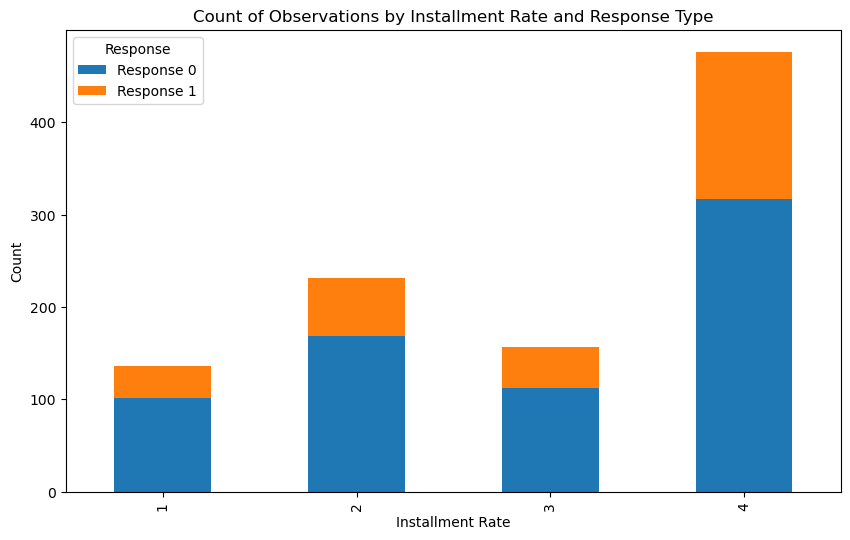

In [30]:
count_data = Credit_Risk.groupby(['installment_rate', 'response']).size().reset_index(name='count')

# Pivot the data to have 'installment_rate' as the index and 'response' as columns
pivot_data = count_data.pivot(index='installment_rate', columns='response', values='count')

# Create a bar plot
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Count of Observations by Installment Rate and Response Type')
plt.xlabel('Installment Rate')
plt.ylabel('Count')
plt.legend(title='Response', labels=['Response 0', 'Response 1'])

# Show the plot
plt.show()

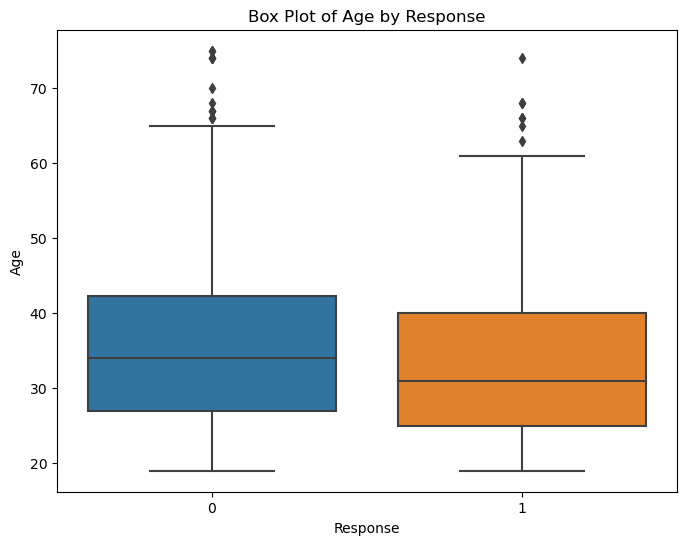

In [33]:
import seaborn as sns
# Creating a box plot age by respone
plt.figure(figsize=(8, 6))
sns.boxplot(x='response', y='age', data=Credit_Risk)

# Customize the plot
plt.title('Box Plot of Age by Response')
plt.xlabel('Response')
plt.ylabel('Age')

# Show the plot
plt.show()


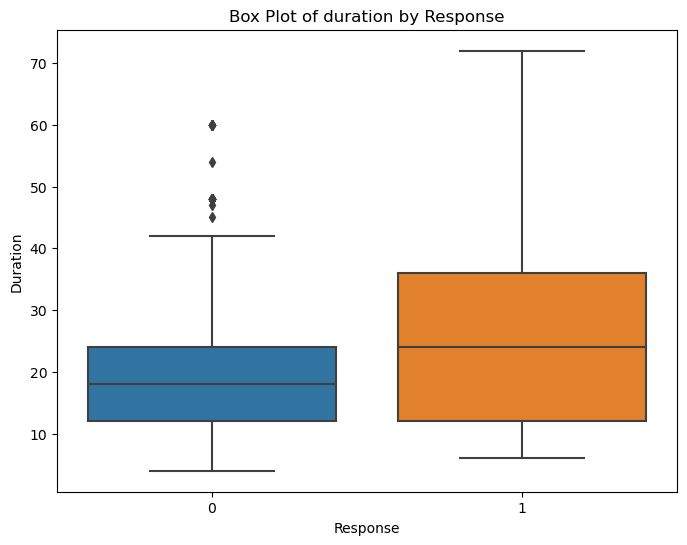

In [36]:
# Creating a box plot duration by respone
plt.figure(figsize=(8, 6))
sns.boxplot(x='response', y='Duration', data=Credit_Risk)

# Customize the plot
plt.title('Box Plot of duration by Response')
plt.xlabel('Response')
plt.ylabel('Duration')

# Show the plot
plt.show()

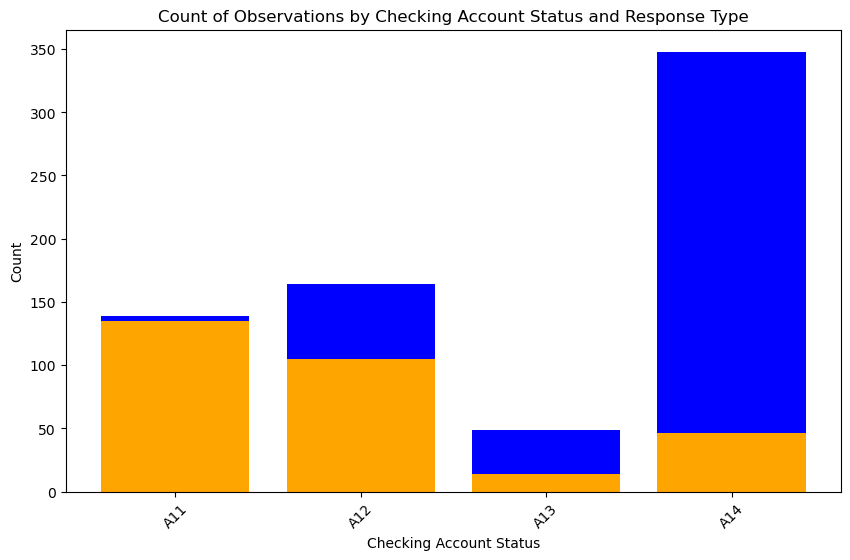

In [39]:
# Group the data by 'chk_acct' and 'response' and count the observations
count_data = Credit_Risk.groupby(['chk_acct', 'response']).size().reset_index(name='count')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(count_data['chk_acct'], count_data['count'],color=['blue', 'orange'])

# Customize the plot
plt.title('Count of Observations by Checking Account Status and Response Type')
plt.xlabel('Checking Account Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

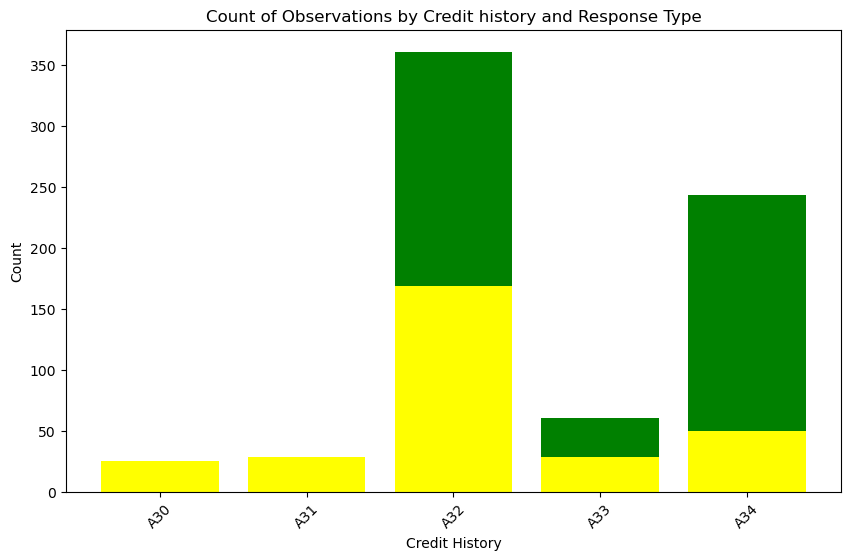

In [40]:
# Group the data by 'Credit_hist' and count of observation by 'response' type
count_data = Credit_Risk.groupby(['credit_his', 'response']).size().reset_index(name='count')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(count_data['credit_his'], count_data['count'],color=['green', 'yellow'])

# Customize the plot
plt.title('Count of Observations by Credit history and Response Type')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [51]:
#Grouping entire data into 2 variables 'x' and 'y'
X = Credit_Risk[['sex','housing','saving_acct','chk_acct','age','Duration','Amount']]
Y = Credit_Risk['response']

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numeric column names
categorical_cols = ['sex', 'housing', 'saving_acct', 'chk_acct']
numeric_cols = ['age', 'Duration', 'Amount']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),  # Normalize numeric columns
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encode categorical columns
    ])

# Create a pipeline for preprocessing and standardization
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('std_scaler', StandardScaler())])

# Fit and transform the data with the pipeline
X_processed = pipeline.fit_transform(X)

# Now, X_processed contains the standardized and preprocessed feature variables

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = Credit_Risk['response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model score (accuracy in this case)
model_score = logistic_regression_model.score(X_test, y_test)

# Print the model score
print(f"Model Score (Accuracy): {model_score:.2f}")

Model Score (Accuracy): 0.74
